## Image and Video Processing 
#### Artificial Intelligence for Business: Week 9 - 10/26/23

___________________________

Tasks:
1. Match images based on features
2. Match images based on similarity
3. Facial recognition
4. Video Processing

__________________________________________

### 1. FEATURE MATCHING

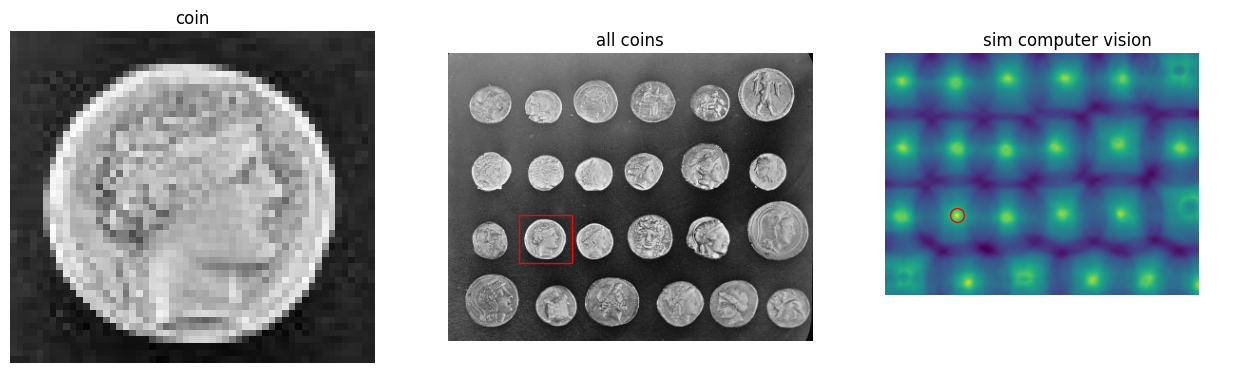

In [2]:
# import basic python libraries
import numpy as np
import matplotlib.pyplot as plt

# Scikit Image (skimage) is the main module we will use to manipulate images
from skimage import data # import data from skimage
from skimage.feature import match_template # load the feature matching library from skimage


image = data.coins() # load an image of coins from the skimage folder/repository
coin = image[170:220, 75:130] # select one coin out of all the coins displayed in the image. the numbers represent the pixel locations

result = match_template(image, coin) # find match with the match_template funciton
ij = np.unravel_index(np.argmax(result), result.shape) # get location of match
x, y = ij[::-1]  # store match coordinates

fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 3, 1) # create subplot in the first position of 1 row 3 columns
ax2 = plt.subplot(1, 3, 2) # create subplot in the second position of 1 row 3 columns
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2) # create subplot in the third position of 1 row 3 columns

# plot theselected coin
ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('coin')

# plot the enitre image of coins
ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('all coins')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

# plot a simulation of the computer's vision
ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('sim computer vision')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

TASK! Can you find the 76ers logo from a set of logos? Hint: Use and modify the same code as above

In [5]:
# import module to help us upload out customized images
from skimage.io import imread, imshow

nba = imread('nbalogos.jpg', as_gray=True)
philly = imread('76ers_crop.jpg', as_gray=True)

result = match_template(nba, philly) # find match
ij = np.unravel_index(np.argmax(result), result.shape) # get location of match
x, y = ij[::-1] # store match coordinates

fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 3, 1) # create subplot in the first position of 1 row 3 columns
ax2 = plt.subplot(1, 3, 2) # create subplot in the second position of 1 row 3 columns
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2) # create subplot in the third position of 1 row 3 columns

ax1.imshow(philly, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('76ers logo')

ax2.imshow(nba, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('all logos')

# highlight matched region
hcoin, wcoin = philly.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('computer vision result')

# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

plt.show()

FileNotFoundError: No such file: '/Users/Jacques/Desktop/fall_2023/nbalogos.jpg'

We can also convert the images into different forms. This helps when you have distorted images or low quality pictures. See example below:

In [ ]:
# import morphing library from skimage
from skimage.filters import sobel_h

nba = imread('nbalogos.jpg', as_gray=True)
philly = imread('knicks.png', as_gray=True)
nba = sobel_h(nba)
philly = sobel_h(philly)

result = match_template(nba, philly) # find match
ij = np.unravel_index(np.argmax(result), result.shape) # get location of match
x, y = ij[::-1] # store match coordinates

fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 3, 1) # create subplot in the first position of 1 row 3 columns
ax2 = plt.subplot(1, 3, 2) # create subplot in the second position of 1 row 3 columns
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2) # create subplot in the third position of 1 row 3 columns

ax1.imshow(philly, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('76ers logo')

ax2.imshow(nba, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('all logos')

# highlight matched region
hcoin, wcoin = philly.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('computer vision result')

# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

plt.show()

TASK! Can you try the above using the Spurs logo?

In [ ]:
# Spurs logo morph

_________________

### 2. IMAGE SIMILARITY

In this section, we will compare two images to score their similarity. We will use deep learning algorithms for this.

In [ ]:
import torch # Pytorch for deeplearning
import open_clip # OpenAI's CLIP (Contrastive Language-Image Pre-training) https://github.com/mlfoundations/open_clip
import cv2 # import opencv
from sentence_transformers import util # Hugginface sentence transformers
from PIL import Image

# image processing model
model, s_data, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")

def imageEncoder(img):
    img1 = Image.fromarray(img).convert('RGB') # convert image to rgb
    img1 = preprocess(img1).unsqueeze(0) # get image values 
    img1 = model.encode_image(img1) # encode image based on pretrained model
    return img1

def generateScore(image1, image2):
    left_img = cv2.imread(image1) # load first image
    right_img = cv2.imread(image2) # load second image
    img1 = imageEncoder(left_img) # encode first image using the function created above
    img2 = imageEncoder(right_img) # encode second image
    cos_scores = util.pytorch_cos_sim(img1, img2) # find the cosine simialrity of the two images
    score = round(float(cos_scores[0][0]), 2) # print the similarity score and round to 2 decimal places
    return score

Now that we have created our function, we can test any two images in our working directory. Are the scores rational?

In [ ]:
# simialrity between logos for Chicago and Memphis
print('similarity Score Bulls vs Grizzlies: ', round(generateScore('bulls_crop.jpg', 'grizzlies_crop.jpg'), 2))

# simialrity between logos for Chicago and Philly
print('similarity Score Bulls vs 76ers: ', round(generateScore('bulls_crop.jpg', '76ers_crop.jpg'), 2))

# simialrity between logos for Minnesota and Philly
print('similarity Score Wolves vs 76ers: ', round(generateScore('wolves_crop.jpg', '76ers_crop.jpg'), 2))

# simialrity between logos for Minnesota and Philly
print('similarity Score Wolves vs Bulls: ', round(generateScore('wolves_crop.jpg', 'bulls_crop.jpg'), 2))

TASK! Find the similarity scores between the images with bikers with helmets and those without.

____________________

### 3. FACIAL RECOGNITION ALGORITHMS

In [ ]:
import face_recognition # import face recognition module https://face-recognition.readthedocs.io/en/latest/face_recognition.html

astronauts = face_recognition.load_image_file("astronauts_group.jpeg")
face_locations = face_recognition.face_locations(astronauts)
face_locations

The output above shows four image locations. The values represent the pixel that form the four square corners where the image is located. The values are in the following order top, left, bottom, right. In the next cell, we will display the faces.

In [ ]:
# for each set of pixels in face_locations
for face_location in face_locations:

    # create 4 variables to store the output for each set
    top, right, bottom, left = face_location

    # display each face in a pop-up window
    face_image = astronauts[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

Next, we will train our algorithm to learn Jeff Bezo's face and find him in a group picture.

In [ ]:
jeff = face_recognition.load_image_file("jeff_single.jpeg") # load Jeff's picture
jeff_face_encoding = face_recognition.face_encodings(jeff)[0] # we use 0 because we know there is only one face... which is in the 0th position

astronauts = face_recognition.load_image_file("astronauts.jpeg") # load group picture
astronauts_face_encoding = face_recognition.face_encodings(astronauts)
astronauts_face_encoding_len = len(astronauts_face_encoding)

# for each face in astronauts group, compare with Jeff's
for i in range(0, astronauts_face_encoding_len):
    results = face_recognition.compare_faces([jeff_face_encoding], astronauts_face_encoding[i])
    if results[0] == True:
        print("Jeff is in the group picture!")

Next, our algorithm will learn the faces of three of your favorite professor's favorite actresses in individual images, and attempt to find them in group images.

In [ ]:
from skimage import io

kate = face_recognition.load_image_file("kate_single.jpg") # load Kate image
priyanka = face_recognition.load_image_file("priyanka_single.jpeg") # load Priyanka's image
lucy = face_recognition.load_image_file("lucy_single.webp") # load Lucy's image
actresses = {'kate':kate,'priyanka':priyanka, 'lucy':lucy} # save actresses as a list

g1 = face_recognition.load_image_file('group_one.jpeg') # this image has Priyanka in it
g2 = face_recognition.load_image_file('group_two.webp') # this image has Lucy in it
g3 = face_recognition.load_image_file('group_three.jpeg') # this group image has Kate in it
group_pictures = [g1, g2, g3] # save group images to list

# for each actress
for actress in actresses:
    
    # check each group picture to see if actress can be found
    print('hang on. looking for ',actress)
    for g in group_pictures:
        actress_face_encoding = face_recognition.face_encodings(actresses[actress])[0]
        group_face_encoding = face_recognition.face_encodings(g)
        group_face_encoding_len = len(group_face_encoding)
        
        # for each face in group picture, look for actresses face
        for i in range(0, group_face_encoding_len):
            results = face_recognition.compare_faces([actress_face_encoding], group_face_encoding[i])

            if results[0] == True:
                print("Found a picture of ",actress,"!")
                io.imshow(g)
                plt.show()
    print("damn! I'm too good")
    print()

__________

### 4. VIDEO PROCESSING

In this section, we will work with a short video (about 1min long). First, let us display video frames with faces.

In [ ]:
# Loading video for face detection
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
%matplotlib inline 

video_capture = cv2.VideoCapture("jeff_vid_hd.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 96 frames to speed up process. Generally, 1sec = 24frames.
    frame_count += 1
    if frame_count % 96 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #frame = cv2.resize(frame, (540, 380), fx = 0, fy = 0, interpolation = cv2.INTER_CUBIC)
        
        # Display video frame
        plt.title("Video Shot")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')
        plt.show()

In [ ]:
# Loading video for face detection
video_capture = cv2.VideoCapture("jeff_vid_hd.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 96 frames to speed up process. Generally, 1sec = 24frames.
    frame_count += 1
    if frame_count % 96 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)      

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')
        
        # check to see if faces were found
        if len(face_locations) != 0:
            print(len(face_locations))
            
            # save frame as a jpeg file if faces were found
            cv2.imwrite('clip_'+str(frame_count)+'.jpg',rgb_frame)
            unknown_picture = face_recognition.load_image_file('clip_'+str(frame_count)+'.jpg')
            unknown_face_encoding = face_recognition.face_encodings(unknown_picture)
            unknown_face_encoding_len = len(unknown_face_encoding)
            
            for i in range(0, unknown_face_encoding_len):
                results = face_recognition.compare_faces([jeff_face_encoding], unknown_face_encoding[i])
                if results[0] == True:
                    print("Found Jeff!")
                else:
                    print("It's not a picture of Jeff!")
                # ... and hold it until a new frame appears
            
                # Show frame...
                # Display video frame
                plt.title("Video Shot")
                plt.imshow(frame) 
                plt.show() 
            #clear_output(wait=True)

In [ ]:
# is Jeff happy?
https://www.geeksforgeeks.org/facial-expression-detection-using-deepface-module-in-python/

TASK! Can you detect Kate's face in the video file 'kate_vid_hd.mp4?'

We can also use facial recognition to discern a person's emotion. For the first task, we will use Kate's image.

In [ ]:
# load image and preview
check_emotion = cv2.imread('kate_single.jpg') 
  
# call imshow() using plt object 
plt.imshow(check_emotion[:, :, : : -1]) # we need the -1 to get the original image
  
# display that image 
plt.show()

In [ ]:
# import deepface for emotion detection
from deepface import DeepFace

# storing the result 
emotion = DeepFace.analyze(emotion, actions = ['emotion']) 
  
# print result 
print(emotion)

In [ ]:
# we can print a single score from the result
print('Kate is ', emotion[0]['dominant_emotion'], '!')

TASK! Can you predict Lucy's emotion? 

In [2]:
#%pip install opencv-python
#%pip install torch
%pip install open_clip_torch
#%pip install sentence_transformers
#%pip install face_recognition
#%pip install deepface

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 59.5 MB 279 kB/s            
  Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
  Using cached networkx-3.2-py3-none-any.whl (1.6 MB)
     |████████████████████████████████| 133 kB 8.4 MB/s            
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the nea